# COGS 108 - Effectiveness of Height and Weight on a Basketball Player's Success

## Permissions

Place an `X` in the appropriate bracket below to specify if you would like your group's project to be made available to the public. (Note that student names will be included (but PIDs will be scraped from any groups who include their PIDs).

* [X] YES - make available
* [  ] NO - keep private

# Overview

In this project, we are trying to find if height or weight plays a role in a basketball player's success in the NBA based on their EFF (efficiency) score made up of points, rebounds, assists, steals, blocks, turnovers and shot attempts. We used a public data set on basketball players' stats per season in order to calculate their EFF and analyze the correlations to their height and weight. We used different statistical analyses to look at which factor has a statisically significant impact on the EFF. Our results reveal that neither height or weight have a statistically significant effect on their EFF which suggests that there is no correlation between height or weight and being successful in the NBA.

# Names

- Elise Ngo
- Ellie Kanda
- Hayley Yamamoto
- Zongze Chen
- Kevin Wong

<a id='research_question'></a>
# Research Question

Is height or weight more influential in successful NBA players based on their EFF (efficiency) score made up of the player's points made, rebounds, assists, steals, blocks, missed field goals, missed free throws, turnovers, and games played?

<a id='background'></a>

## Background & Prior Work

One of the most common questions tall people receive is “Do you play basketball?”, but is height really what makes a “successful” basketball player? We also recognize that weight could also affect a person’s athletic ability like their vertical jump and agility, so we were also interested in looking at how weight may play a role in NBA players’ success. While weight may play a role, we are only looking at the sheer mass of a player rather than their body fat percentage or muscle mass, which are the factors that may be more correlated with agility and performance. Our team seeks to answer the question of whether physical attributes are influential in making a “successful” basketball player by comparing the correlation of height and weight with their EFF (efficiency scores).

Prior work indicates that the many basketball players often “possess high strength, power and agility while maintaining a fairly lean body composition” (Ranson 1). In Ranson’s article “Physiologic Profile of Basketball Athletes” (2017), he studies the structural and functional demands on basketball players such as energy demands, body composition, strength, power, and agility to find the ideal physiologic profile of a successful basketball player. Ranson found that although strength, power, and agility might predict success, “Ideal physique and physiology are not sufficient for excellence in basketball.” In a related article, “Is Height important in Basketball”, Nall asserts that the height of a basketball player gives them an advantage in shot accuracy and grabbing a rebound. However in the end of the article she admits that for “What a basketball player gains in leverage thanks to his height, he may lose on other aspects including speed and agility”, and thus we must not immediately assume that height is the most influential factor in basketball “success”.

In a separate article, Scott Kaufman explains the largest study to date on this topic where psychologists, Jerad Moxley and Tyler Towne, researched whether performance in the NBA is predicted by physical makeup and athleticism. They looked at many variables, “including player position (guard, forward, center), age at the beginning of the next NBA season, college performance (win shares)*, college quality, height, agility, no-step vertical leap, arm span, and weight” (2014). They concluded that “the only variables that predicted NBA success were youth, college performance, and college quality” (2014). The researchers brought up a good point that their sample of over 300 NBA players is an elite sample when it comes to physical makeup and athleticism, so obviously there are certain physical and athletic advantages they have over the rest of the population which helped them get into the NBA in the first place. They ended up factoring out physical characteristics like height, weight, and wingspan as a reason for success since these characteristics are pretty similar across most NBA players. Since an average NBA is taller, heavier and more muscular, and has a longer wingspan than the average man, these characteristics didn’t stand out in Moxley and Towne’s study.

All three of these articles offer interesting insight about what makes a basketball player great. While both Ranson’s and Nall’s articles believe that physical characteristics such as height and weight play a large role in a player’s ability to perform in the league, they are not sufficient for predicting excellence and leaning one way or another in both height and weight can have some tradeoffs in what the body is capable of doing on the court. Moxley and Towne’s study mention that physical characteristics play a large role in even making it to the NBA, so they are all around similar heights and weights once they get to the league. Because of this, height and weight aren’t good ways to determine efficiency because they are too similar among all the players. These findings report a somewhat consistent result about what makes an NBA player the most successful, but we believe that there is more that needs to be explored about this topic.

References:
- 1) Physiologic Profile of Basketball Athletes (Ranson) -https://www.gssiweb.org/sports-science-exchange/article/physiologic-profile-of-basketball-athletes
- 2) What Predicts NBA Success (Kaufman) https://blogs.scientificamerican.com/beautiful-minds/what-predicts-nba-success/
- 3) Is Height Important in Basketball? (Nall) (https://www.livestrong.com/article/363066-is-height-important-in-basketball/)

# Hypothesis


We hypothesize that height will be the most common factor between successful NBA players based on their EFF score because height can be important when it comes to being able to score a goal or defend the ball. Additionally, the average height of players in the NBA is 6’6”, so we can infer that how tall a basketball player is more influential in their success than weight.

# Dataset(s)

- Dataset 1:
- Name: Basketball Players Stats per Season - 49 Leagues 
- Link: https://www.kaggle.com/jacobbaruch/basketball-players-stats-per-season-49-leagues 
- Number of observations: 14582
- Description: This dataset contains basketball statistics as well as player details, like height, weight, birth date, nationality, and high school, from the seasons 1999 - 2020 for 49 leagues.

# Setup

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns
sns.set()
sns.set_context('talk')

import warnings
warnings.filterwarnings('ignore')

import patsy
import statsmodels.api as sm
import scipy.stats as stats
from scipy.stats import ttest_ind, chisquare, normaltest

# Data Cleaning

We received our data through Kaggle, and it was already in a clean and tidy format. Each observation was already split into columns as well. So for our data cleaning, we only need to drop the columns that we will not need for our EDA. First, we downloaded the csv file and uploaded it onto Github to access it for our project.

In [2]:
#Import csv file
stats_by_season = pd.read_csv('players_stats_by_season_full_details.csv')
stats_by_season

,League,Season,Stage,Player,Team,GP,MIN,FGM,FGA,3PM,...,birth_date,height,height_cm,weight,weight_kg,nationality,high_school,draft_round,draft_pick,draft_team
0,NBA,1999 - 2000,Regular_Season,Shaquille O'Neal,LAL,79,3163.0,956,1665,0,...,"Mar 6, 1972",7-1,216.0,325.0,147.0,United States,Robert G. Cole High School,1.0,1.0,Orlando Magic
1,NBA,1999 - 2000,Regular_Season,Vince Carter,TOR,82,3126.0,788,1696,95,...,"Jan 26, 1977",6-6,198.0,220.0,100.0,United States,Mainland High School,1.0,5.0,Golden State Warriors
2,NBA,1999 - 2000,Regular_Season,Karl Malone,UTA,82,2947.0,752,1476,2,...,"Jul 24, 1963",6-9,206.0,265.0,120.0,United States,Summerfield High School,1.0,13.0,Utah Jazz
3,NBA,1999 - 2000,Regular_Season,Allen Iverson,PHI,70,2853.0,729,1733,89,...,"Jun 7, 1975",6-0,183.0,165.0,75.0,United States,Bethel High School,1.0,1.0,Philadelphia Sixers
4,NBA,1999 - 2000,Regular_Season,Gary Payton,SEA,82,3425.0,747,1666,177,...,"Jul 23, 1968",6-4,193.0,180.0,82.0,United States,Skyline High School,1.0,2.0,Seattle SuperSonics
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53944,Ukrainian-Superleague,2019 - 2020,International,Kyrylo Meshheryakov,MYK,15,127.0,7,28,2,...,"Aug 17, 1995",6-6,198.0,182.0,83.0,Ukraine,NaN,NaN,NaN,NaN
53945,Ukrainian-Superleague,2019 - 2020,International,Yaroslav Kadygrob,ODE,10,81.7,5,16,4,...,"Oct 28, 1991",6-3,191.0,187.0,85.0,Ukraine,NaN,NaN,NaN,NaN
53946,Ukrainian-Superleague,2019 - 2020,International,Ernesto Tkachuk,ODE,16,124.7,1,15,0,...,"Sep 17, 1994",6-2,188.0,200.0,91.0,Ukraine,NaN,NaN,NaN,NaN
53947,Ukrainian-Superleague,2019 - 2020,International,Andrij Shapovalov,KHAR,12,59.2,0,8,0,...,"Nov 10, 1993",6-2,188.0,171.0,78.0,Ukraine,NaN,NaN,NaN,NaN


We're looking at whether height or weight contributes more to the success of an NBA player. To quantify the success of a NBA player, we're going to calculate their efficiency (EFF) which includes: points made, rebounds, assists, steals, blocks, missed field goals, missed free throws, turnovers, and games played. 

We decided to look at their height in centimeters and their weight and kilograms. So we're removing the columns that aren't necessary to calculating the EFF and aren't their height in centimeters and weight in kilograms.

In [3]:
#Drop columns we don't need
stats_by_season = stats_by_season.drop(['birth_year', 'birth_month', 'birth_date',
                           'nationality','high_school','height','weight',
                           'draft_round','draft_team','draft_pick','Stage','Team','Season'],axis=1)
stats_by_season

,League,Player,GP,MIN,FGM,FGA,3PM,3PA,FTM,FTA,...,PF,ORB,DRB,REB,AST,STL,BLK,PTS,height_cm,weight_kg
0,NBA,Shaquille O'Neal,79,3163.0,956,1665,0,1,432,824,...,255,336,742,1078,299,36,239,2344,216.0,147.0
1,NBA,Vince Carter,82,3126.0,788,1696,95,236,436,551,...,263,150,326,476,322,110,92,2107,198.0,100.0
2,NBA,Karl Malone,82,2947.0,752,1476,2,8,589,739,...,229,169,610,779,304,79,71,2095,206.0,120.0
3,NBA,Allen Iverson,70,2853.0,729,1733,89,261,442,620,...,162,71,196,267,328,144,5,1989,183.0,75.0
4,NBA,Gary Payton,82,3425.0,747,1666,177,520,311,423,...,178,100,429,529,732,153,18,1982,193.0,82.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53944,Ukrainian-Superleague,Kyrylo Meshheryakov,15,127.0,7,28,2,13,3,4,...,27,4,14,18,8,1,3,19,198.0,83.0
53945,Ukrainian-Superleague,Yaroslav Kadygrob,10,81.7,5,16,4,14,1,3,...,2,2,4,6,3,0,0,15,191.0,85.0
53946,Ukrainian-Superleague,Ernesto Tkachuk,16,124.7,1,15,0,11,7,14,...,12,0,15,15,10,6,1,9,188.0,91.0
53947,Ukrainian-Superleague,Andrij Shapovalov,12,59.2,0,8,0,7,3,6,...,6,1,4,5,3,1,0,3,188.0,78.0


This dataset also contains the stats of players in International leagues, but we're only looking at players in the NBA. Therefore, we removed all the stats of players who aren't in the NBA and then dropped the 'League' column. Since the remaining players should all be in the NBA, we no longer needed that column.

In [4]:
#Drop rows where the league isn't the NBA
stats_by_season = stats_by_season[stats_by_season['League']=='NBA'].reset_index()
#Drop league column
stats_by_season = stats_by_season.drop(['League','index'],axis=1)
stats_by_season

,Player,GP,MIN,FGM,FGA,3PM,3PA,FTM,FTA,TOV,PF,ORB,DRB,REB,AST,STL,BLK,PTS,height_cm,weight_kg
0,Shaquille O'Neal,79,3163.0,956,1665,0,1,432,824,223,255,336,742,1078,299,36,239,2344,216.0,147.0
1,Vince Carter,82,3126.0,788,1696,95,236,436,551,178,263,150,326,476,322,110,92,2107,198.0,100.0
2,Karl Malone,82,2947.0,752,1476,2,8,589,739,231,229,169,610,779,304,79,71,2095,206.0,120.0
3,Allen Iverson,70,2853.0,729,1733,89,261,442,620,230,162,71,196,267,328,144,5,1989,183.0,75.0
4,Gary Payton,82,3425.0,747,1666,177,520,311,423,224,178,100,429,529,732,153,18,1982,193.0,82.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7628,Wesley Iwundu,5,75.8,6,20,4,7,5,8,3,5,1,10,11,4,3,2,21,201.0,88.0
7629,Semi Ojeleye,13,122.2,7,28,5,23,2,2,1,9,2,10,12,1,3,0,21,201.0,109.0
7630,J.R. Smith,10,74.9,7,26,6,22,0,0,7,11,0,3,3,3,2,0,20,198.0,102.0
7631,Juwan Morgan,7,86.5,3,12,2,10,2,6,1,11,6,15,21,5,2,0,10,203.0,105.0


Lastly, we checked all columns for any null values and looked at the data types to make sure all the observations were useable.

In [5]:
#Check for null values
print(stats_by_season.isnull().values.any())
#Check all data types are ints or floats (except players)
stats_by_season.dtypes

False


Player        object
GP             int64
MIN          float64
FGM            int64
FGA            int64
3PM            int64
3PA            int64
FTM            int64
FTA            int64
TOV            int64
PF             int64
ORB            int64
DRB            int64
REB            int64
AST            int64
STL            int64
BLK            int64
PTS            int64
height_cm    float64
weight_kg    float64
dtype: object

# Data Analysis & Results

Include cells that describe the steps in your data analysis.

In [6]:
#check if there are repeated values in the 'Player' column
(stats_by_season['Player'].value_counts()==1)

Tony Parker         False
Tim Duncan          False
Dirk Nowitzki       False
LeBron James        False
Vince Carter        False
                    ...  
Isaiah Whitehead     True
Bimbo Coles          True
Julian Wright        True
Mario West           True
Juwan Morgan         True
Name: Player, Length: 1119, dtype: bool

We can see that there are a number of repeated values in the Player Column, and that there are 1119 unique players in this dataset.

In [7]:
#calculate each player's EFF in each season and store them into a new column "EFF"
#EFF = (PTS + REB + AST + STL + BLK − FGM − FTM - TOV) / GP
stats_by_season['EFF'] = (stats_by_season['PTS'] + stats_by_season['REB'] + stats_by_season['AST'] + stats_by_season['STL'] + stats_by_season['BLK']
                         - stats_by_season['FGM'] - stats_by_season['FTM'] - stats_by_season['TOV']) / stats_by_season['GP']
#Keep only the 'Player','height_cm','weight_kg','EFF' columns
stats_by_season = stats_by_season[['Player','EFF','height_cm','weight_kg']]

#Sort the dataframe in an descending order of EFF
stats_by_season = stats_by_season.sort_values(by = ['EFF'], ascending = False).reset_index()

stats_by_season

,index,Player,EFF,height_cm,weight_kg
0,6213,Russell Westbrook,33.600000,191.0,91.0
1,1220,Kevin Garnett,33.500000,211.0,109.0
2,7079,Nikola Jokic,31.928571,213.0,113.0
3,207,Shaquille O'Neal,31.478261,216.0,147.0
4,904,Kevin Garnett,31.333333,211.0,109.0
...,...,...,...,...,...
7628,3057,Tony Allen,1.066667,193.0,97.0
7629,1672,Darvin Ham,1.047619,201.0,100.0
7630,7069,Zach Lofton,0.000000,193.0,82.0
7631,7067,Tyler Ulis,0.000000,178.0,68.0


Using the columns that we kept from our data cleaning (excluding height and weight), we will calculate the EFF. We are essentially taking the sum of all the positive contributions done by the player and from that, subtracting all the negative errors or missed opportunities of the player. After computing this value, we created a subset dataframe made up of the values that we wanted to analyze.

EFF = ( points + rebounds + assists + steals + blocks - missed field goals - missed free throws - turnovers ) / games played

There were multiple entries of the same players due to the fact that they've played multiple seasons in the NBA. We decided that the most fair way to determine a player's EFF was to take the average of a player's EFF score (if there were multiple).

In [8]:
#Calculate the average EFF of each player of all seasons
stats_average = stats_by_season.groupby('Player').mean().sort_values(by = ['EFF'], ascending = False).reset_index()
stats_average = stats_average.drop(['index'], axis = 1)
stats_average

,Player,EFF,height_cm,weight_kg
0,LeBron James,25.968845,203.0,113.0
1,Anthony Davis,25.750773,208.0,115.0
2,Luka Doncic,25.650046,201.0,99.0
3,Nikola Jokic,23.876559,213.0,113.0
4,Karl-Anthony Towns,23.868245,213.0,112.0
...,...,...,...,...
1114,Rodney Buford,1.800000,196.0,86.0
1115,Acie Law,1.428571,191.0,92.0
1116,Mario West,1.390625,196.0,95.0
1117,John Holland,0.000000,196.0,93.0


<AxesSubplot:xlabel='EFF', ylabel='Count'>

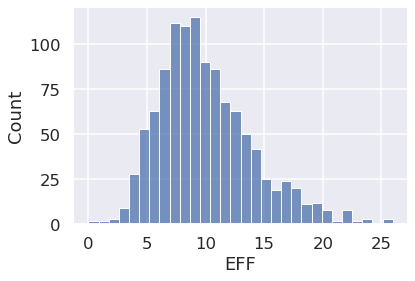

In [9]:
#histogram of average EFF
sns.histplot(stats_average['EFF'], bins = 30)

As we can see, there are no severe outliers in both diagrams. Therefore, no transformation is needed.

<AxesSubplot:xlabel='height_cm', ylabel='Count'>

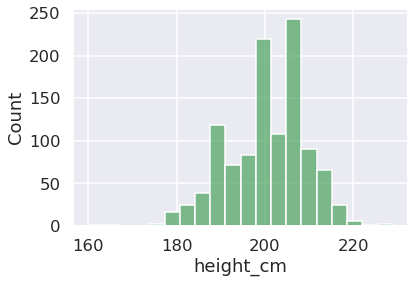

In [10]:
#histogram of players' height
sns.histplot(stats_average['height_cm'], bins = 20, color = 'g')

<AxesSubplot:xlabel='weight_kg', ylabel='Count'>

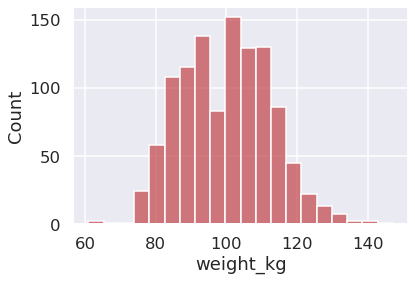

In [11]:
#histogram of players' weight
sns.histplot(stats_average['weight_kg'], bins = 20, color = 'r')

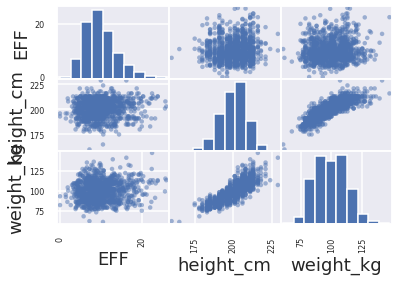

In [12]:
fig2 = pd.plotting.scatter_matrix(stats_average)

<AxesSubplot:xlabel='height_cm', ylabel='EFF'>

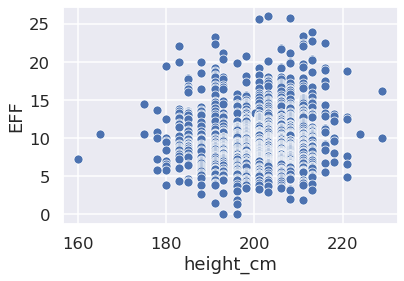

In [13]:
#lineplot of height as the independent variable and EFF as the dependent variable
sns.scatterplot(x='height_cm', y = 'EFF', data = stats_average, estimator = 'mean')

<AxesSubplot:xlabel='weight_kg', ylabel='EFF'>

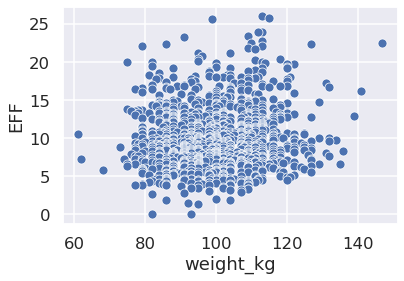

In [14]:
#lineplot of weight as the independent variable and EFF as the dependent variable
sns.scatterplot(x='weight_kg', y = 'EFF', data = stats_average, estimator = 'mean')

We observed that both height and weight do not have linear relationship, but to further this conclusion, we ran a linear regression to see what the r coefficient would show us.

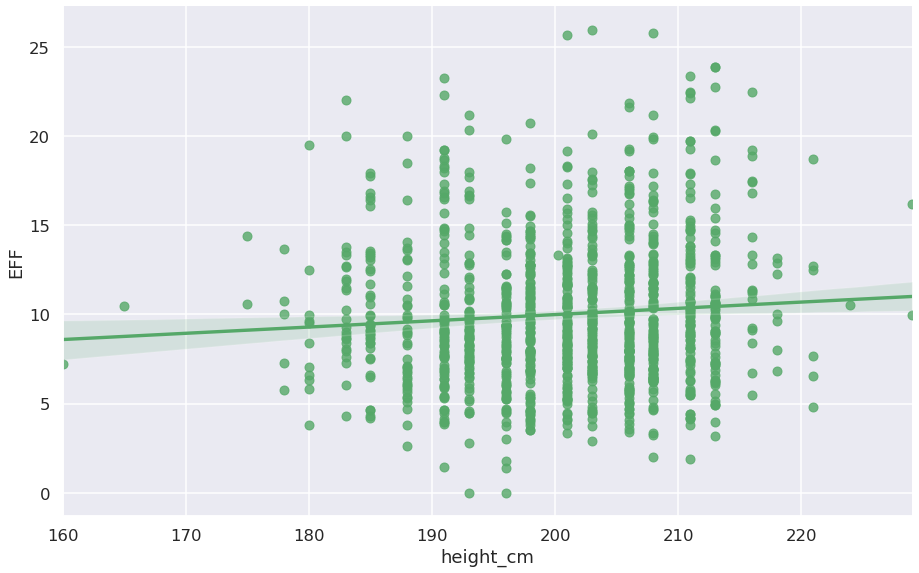

In [15]:
#scatterplot of height as independent and EFF as dependent variable
sns.lmplot(
    x = "height_cm",
    y = "EFF",
    data = stats_average,
    scatter_kws = {'color':'g'},
    line_kws = {'color':'g'},
    aspect = 1.6,
    size = 8,
    #fit_reg = True,
)

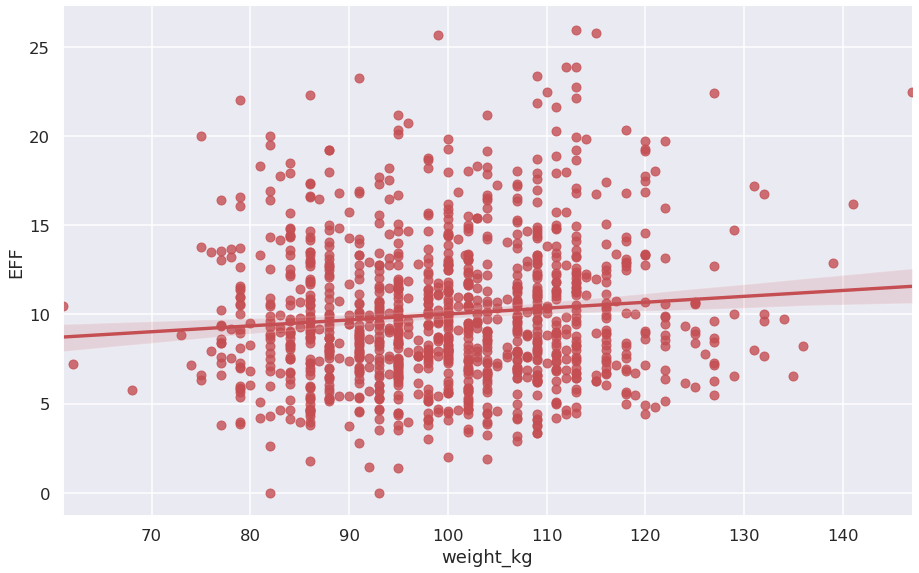

In [16]:
#scatterplot of weight as independent and EFF as dependent variable
sns.lmplot(
    x = "weight_kg",
    y = "EFF",
    data = stats_average,
    scatter_kws = {'color':'r'},
    line_kws = {'color':'r'},
    aspect = 1.6,
    size = 8,
    #fit_reg = True,
)

In [17]:
df=stats_average[['EFF', 'height_cm']]
df.columns = ['EFF','height_cm']
outcome, predictors = patsy.dmatrices('EFF ~ height_cm',df)

mod_log = sm.OLS(outcome, predictors)

fit_res = mod_log.fit()

print(fit_res.summary())
fit_res.pvalues[1]

                            OLS Regression Results                            
Dep. Variable:                    EFF   R-squared:                       0.006
Model:                            OLS   Adj. R-squared:                  0.005
Method:                 Least Squares   F-statistic:                     6.745
Date:                Thu, 09 Dec 2021   Prob (F-statistic):            0.00952
Time:                        18:10:56   Log-Likelihood:                -3152.0
No. Observations:                1119   AIC:                             6308.
Df Residuals:                    1117   BIC:                             6318.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9993      2.707      1.108      0.2

0.00952198293457168

From the regression results we observed that the p value is 0.010, which is lower than the critical value. It means there is no significant chance that the linear regression model describes the relationship between players' height and EFF better than the null hypothesis, and therefore the null hypothesis cannot be rejected.

On the other hand, the r value of height in relation to EFF is 0.0774, which shows that the linear regression model describes the data poorly, and therefore isn't the best to describe the relationship between players' height and their EFF.

In [18]:
df=stats_average[['EFF', 'weight_kg']]
df.columns = ['EFF','weight_kg']
outcome, predictors = patsy.dmatrices('EFF ~ weight_kg',df)

mod_log = sm.OLS(outcome, predictors)

fit_res = mod_log.fit()

print(fit_res.summary())
fit_res.pvalues[1]

                            OLS Regression Results                            
Dep. Variable:                    EFF   R-squared:                       0.010
Model:                            OLS   Adj. R-squared:                  0.009
Method:                 Least Squares   F-statistic:                     11.47
Date:                Thu, 09 Dec 2021   Prob (F-statistic):           0.000733
Time:                        18:11:46   Log-Likelihood:                -3149.6
No. Observations:                1119   AIC:                             6303.
Df Residuals:                    1117   BIC:                             6313.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.7180      0.983      6.834      0.0

0.0007332691939644296

From the regression results we observed that the p value is 0.001, which is significantly lower than the critical value. It means there is no significant chance that the linear regression model describes the relationship between players' weight and EFF better than the null hypothesis, and therefore the null hypothesis cannot be rejected.

On the other hand, the r value of height in relation to EFF is 0.1000, which shows that the linear regression model describes the data poorly, and therefore isn't the best to describe the relationship between players' weight and their EFF.

We conclude that neither height nor weight have a linear relationship with the success (the EFF) of a basketball player. Therefore, we can not use the linear regression model to compare the impact of height and weight on players' EFF.

# Ethics & Privacy

Our research consists of data found in the dataset "Basketball Players Stats per Season - 49 Leagues", which had been scrapped using publically available data found on sport statistic websites. Additionally, NBA player and game statistics are publically available on the NBA website as well. Therefore, we do not anticipate any ethical or privacy concerns from the data we used because the players consented and have a clear understanding of how their personal data is being used. The players' game statistics also do not violate any of their privacies since they do not contain personal information and are made up of performance data. We do not anticipate any biases from our dataset because the data is collected by human scorekeepers present during each game and also an optical tracking system where games are captured by cameras that extract data through computer vision algorithms. Furthermore, there are no biases that would affect the data in terms of exclusion, besides players that may have started after the date that the data was collected which is why our research focuses on the players that were active during the NBA Seasons 1999-2020.

# Conclusion & Discussion

Through cleaning and applying appropriate manipulations of the data, we found that we were unable to determine the success of a basketball player through just their height and weight. By using the EFF formula as a metric to measure the success of a basketball player through specific stats that were included in the datasets, we were able to create models that displayed the effect of both height and weight in the determination of the score. However, because the results that we received from the model suggests that although both of them have an effect, neither of them actually had an significant impact on the score. What we could have done differently would be creating a linear regression model that had a formula that contained each of the variables necessary to construct the EFF score itself, and compare each of the p values that we got from the resulting model's summary. In this way, not only would we be able to calculate the effectiveness of every variable relative to others, we would be able to find an optimal combination of variables that had the greatest effect on the model itself. In conclusion, given the height and weight of a basketball player, it is not possible to find the probablity of success based solely on those values.

# Team Contributions

- Elise: Data Cleaning, Overview, Ethics & Privacy
- Ellie: Background, EDA, Hypothesis
- Hayley: Background, EDA
- Zongze: EDA
- Kevin: Data Cleaning, Conclusion & Discussion, EDA